In [1]:
import pandas as pd
import numpy as np
from mega import get_peaks, numf
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv('cases.csv')
df.head()

,dates,cases
0,1/22/20,0.857143
1,1/23/20,0.714286
2,1/24/20,0.428571
3,1/25/20,0.571429
4,1/26/20,0.571429


In [3]:
M = df['cases'].to_numpy().reshape(-1, 1)

In [4]:
r = 10
m, n = M.shape

In [7]:
saved_obj = np.load('results2.npz')
W0 = saved_obj['W']
H0 = saved_obj['H']

In [8]:
print(np.linalg.norm(M - W0 @ H0, 'fro') / np.linalg.norm(M, 'fro'))

0.34866460507441116


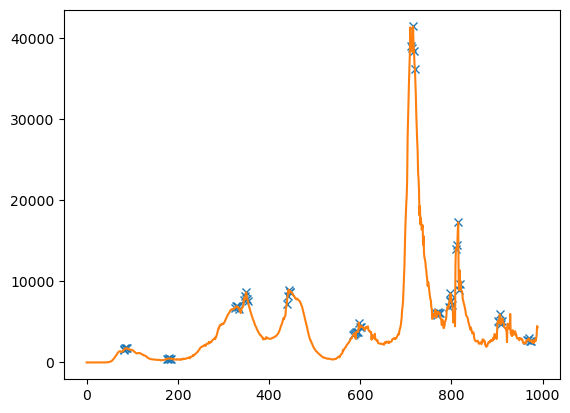

In [9]:
pvals = get_peaks(M, nrad=4)
plt.plot(df.index[pvals], M[pvals], 'x')
plt.plot(df.index, M)

In [ ]:
W, H  = numf(M, W0, H0, pvals=pvals, l2=0.6, iters=5, save_file='results3.npz')

0 0.3650646292080827
W and H matrices saved in results3.npz.
1 0.3472937674944205
W and H matrices saved in results3.npz.
2 0.3529785668597941
W and H matrices saved in results3.npz.
3 0.34202651629042385
W and H matrices saved in results3.npz.


In [ ]:
plt.plot(W0)